In [155]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


https://github.com/scipy/scipy/blob/v1.1.0/scipy/stats/stats.py#L3970-L4092

## one-sample

In [156]:
true_mean = 10
true_sd = 2

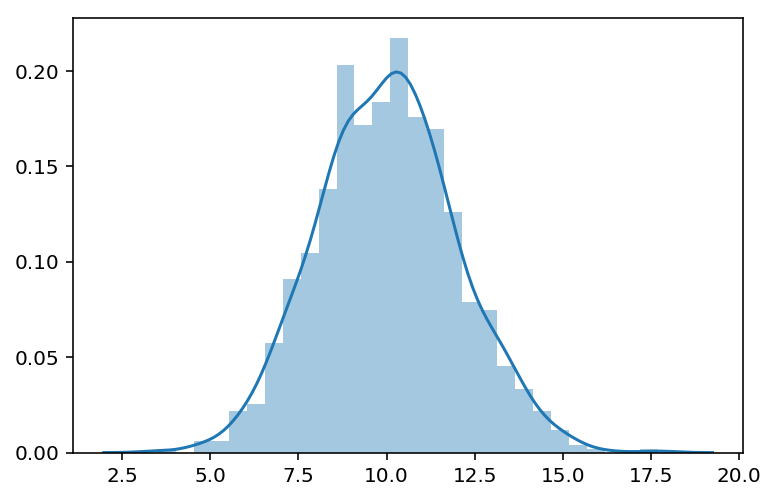

In [157]:
n = 1000
sample = true_sd*np.random.randn(n) + true_mean

sns.distplot(sample)

$X_i$ for $i=1...n$

$EX_i=true\_mean, Var(X_i)=(true\_sd)^2$ for $i=1...n$

Mean $$Y = \frac{\sum_{i=1}^{n}X_i}{n}$$

By independence of $X_i$s, variance of $Y$:

$$Var(Y) = Var(\sum_{i=1}^{n} (X_i/n)) = \sum_{i=1}^{n} Var(X_i/n)$$ 

Because $Var(aX) = a^2Var(X) (1) $ $(*)$,

$$Var(Y) =  \sum_{i=1}^{n} (1/n)^2 Var(X_i) =  (true\_sd)^2 / n $$


Standard error of the mean $Y$ (SEM):

$$true\_sem = \frac{true\_sd}{\sqrt n}$$ 


$(*)$ follows from 
$$Var(aX) = E(aX)^2 - (EaX)^2=a^2EX^2-(EX)^2 = a^2Var(X)$$
 

In [158]:
N = 1000
samples = [true_sd*np.random.randn(n) + true_mean for i in range(N)]

means_samples = np.array([sample.mean() for sample in samples])

true_mean, means_samples.mean()

(10, 9.9968332326346054)

In [159]:
f"means_samples.std(): {means_samples.std(ddof=1)}, true_sem: {true_sd/np.sqrt(n)}"

'means_samples.std(): 0.0644158535619968, true_sem: 0.06324555320336758'

$$ t = \frac{sample\_mean - nullhypo\_mean}{sem} $$

In [160]:
nullhypo_mean = 9.9

In [161]:
def cal_true_t(sample, nullhypo_mean, true_sd):
    n = sample.shape[0]
    true_sem = true_sd/np.sqrt(n)
    true_t = (sample.mean() - nullhypo_mean)/true_sem
    return true_t

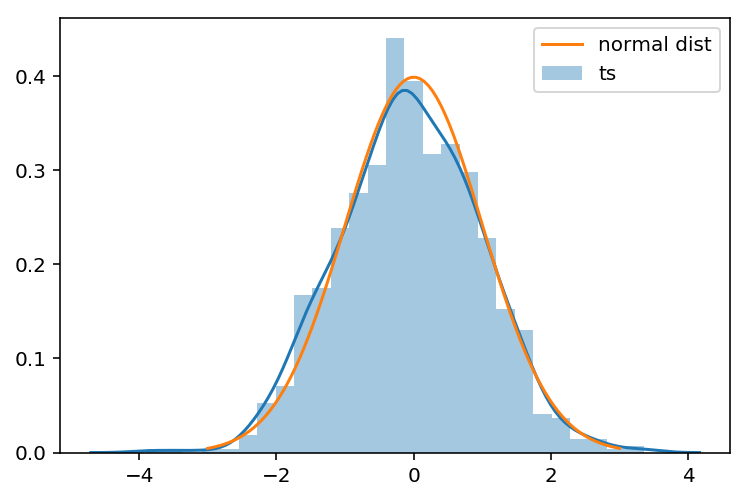

In [162]:
true_ts_samples = [cal_true_t(sample, 
                              nullhypo_mean=true_mean, 
                              true_sd=true_sd) for sample in samples]

sns.distplot(true_ts_samples, label='ts')
xs = np.linspace(-3, 3, 100)
ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
plt.plot(xs, ts, label='normal dist')
plt.legend()

$$ sem = \frac{sample\_sd}{\sqrt n} $$ 
$$ t = \frac{sample\_mean - nullhypo\_mean}{true\_sem} $$

In [163]:
sample.std(ddof=1) / np.sqrt(n), scipy.stats.sem(sample)

(0.061931053715728178, 0.061931053715728178)

In [165]:
def cal_t(sample, nullhypo_mean):
    sem = scipy.stats.sem(sample)
    true_t = (sample.mean() - nullhypo_mean) / sem
    return true_t

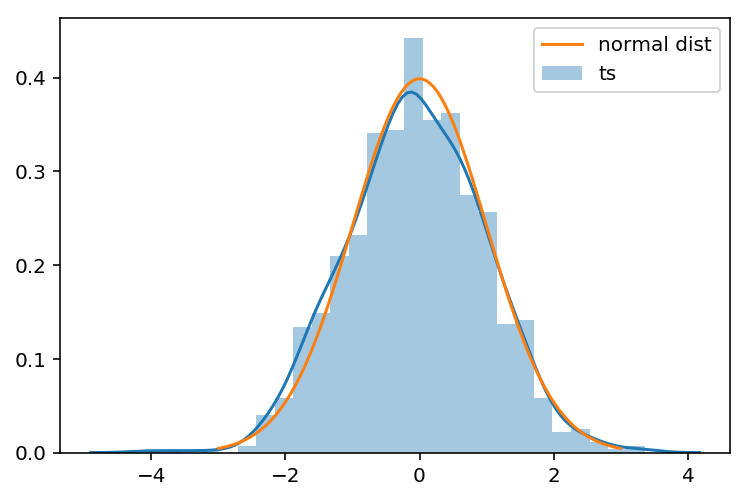

In [166]:
ts_samples = [cal_t(sample, 
                    nullhypo_mean=true_mean) for sample in samples]

sns.distplot(ts_samples, label='ts')
xs = np.linspace(-3, 3, 100)
ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
plt.plot(xs, ts, label='normal dist')
plt.legend()

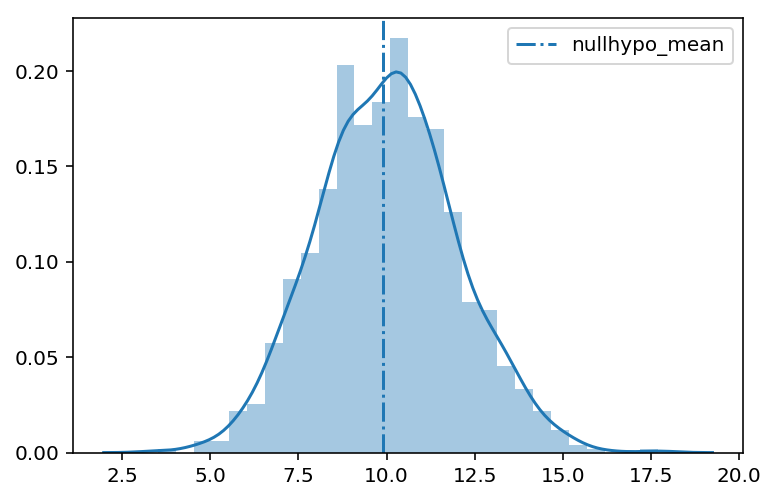

In [167]:
n = 1000

sns.distplot(sample)
plt.axvline(x=nullhypo_mean, linestyle='-.', label='nullhypo_mean')
plt.legend()

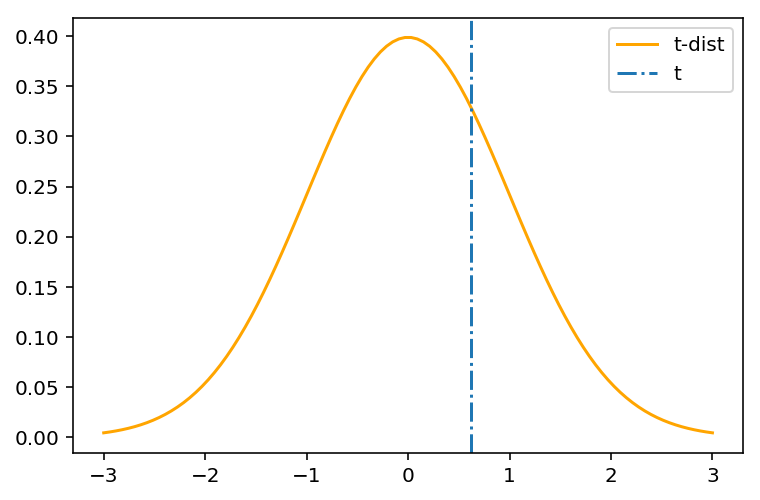

In [168]:
t_sample = cal_t(sample, nullhypo_mean=true_mean)

xs = np.linspace(-3, 3, 100)
ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
plt.plot(xs, ts, label='t-dist', color='orange')
plt.axvline(x=t_sample, linestyle='-.', label='t')
plt.legend()

In [169]:
stat, p = scipy.stats.ttest_1samp(sample, true_mean)
stat, p

(0.62430895850932877, 0.53256724366229635)

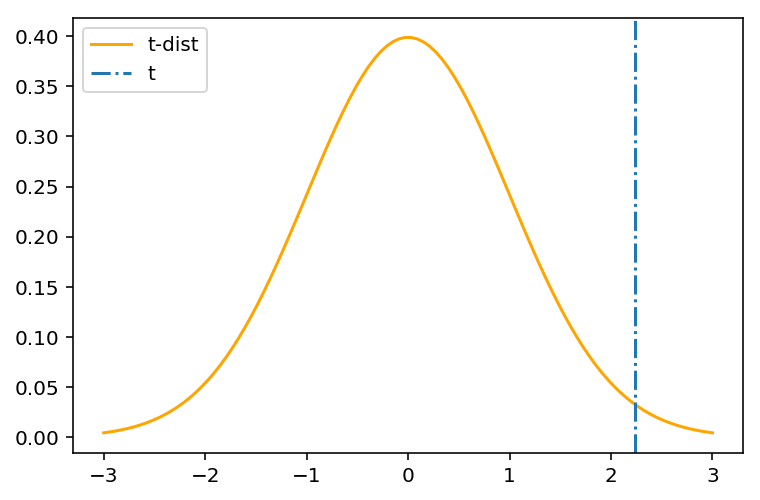

In [170]:
t_sample = cal_t(sample, nullhypo_mean)

xs = np.linspace(-3, 3, 100)
ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
plt.plot(xs, ts, label='t-dist', color='orange')
plt.axvline(x=t_sample, linestyle='-.', label='t')
plt.legend()

In [171]:
1 - scipy.stats.t.cdf(t_sample, df=n-1)

0.012687446472287145

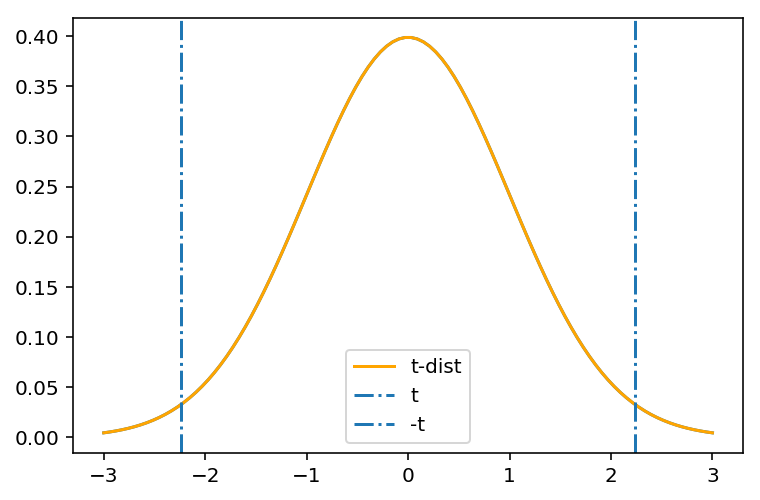

In [172]:
xs = np.linspace(-3, 3, 100)
ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
plt.plot(xs, ts)
plt.plot(xs, ts, label='t-dist', color='orange')
plt.axvline(x=t_sample, linestyle='-.', label='t')
plt.axvline(x=-t_sample, linestyle='-.', label='-t')
plt.legend()

In [173]:
2*(1-scipy.stats.t.cdf(t_sample , df=n-1))

0.02537489294457429

In [174]:
t_sample

2.2390077889056759

In [175]:
stat, p = scipy.stats.ttest_1samp(sample, nullhypo_mean)
stat, p

(2.2390077889056759, 0.025374892944574411)

### confidence interval

In [176]:
confidence=0.95
(1-confidence)/2

0.025000000000000022

In [191]:
t_critial = scipy.stats.t.ppf(1-(1-confidence)/2, df=n-1)
h = t_critial * scipy.stats.sem(sample)
t_critial, h

(1.9623414611334487, 0.12152987443805613)

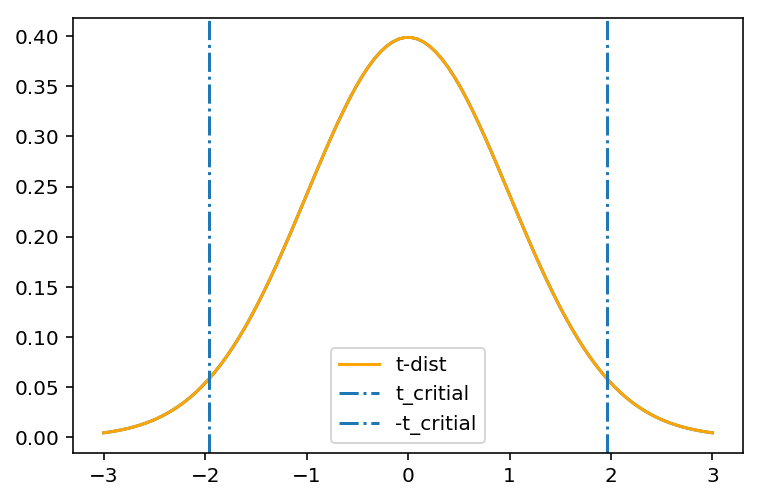

In [192]:
xs = np.linspace(-3, 3, 100)
ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
plt.plot(xs, ts)
plt.plot(xs, ts, label='t-dist', color='orange')
plt.axvline(x=t_critial, linestyle='-.', label='t_critial')
plt.axvline(x=-t_critial, linestyle='-.', label='-t_critial')
plt.legend()

confidence interval

In [193]:
sample.mean() - h, sample.mean() + h

(9.9171342372065947, 10.160193986082708)

In [198]:
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(sample)

(10.038664111644652, 9.9171342372065947, 10.160193986082708)

### t-distribution v.s. normal

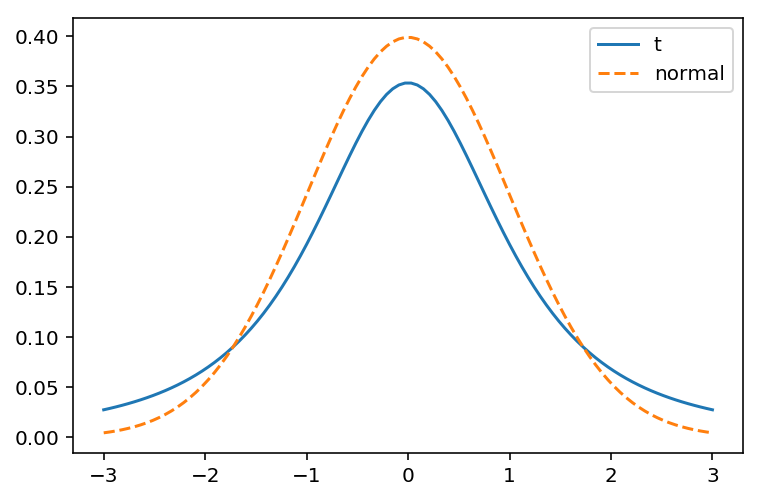

In [146]:
n=3
xs = np.linspace(-3, 3, 100)
ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
ns = [scipy.stats.norm.pdf(x) for x in xs]
plt.plot(xs, ts, label='t')
plt.plot(xs, ns, '--', label='normal')
plt.legend()


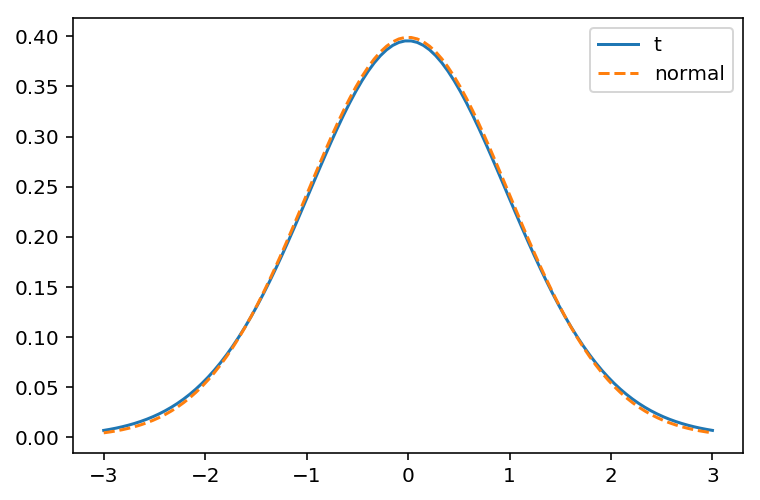

In [147]:
n=30
xs = np.linspace(-3, 3, 100)
ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
ns = [scipy.stats.norm.pdf(x) for x in xs]
plt.plot(xs, ts, label='t')
plt.plot(xs, ns, '--', label='normal')
plt.legend()


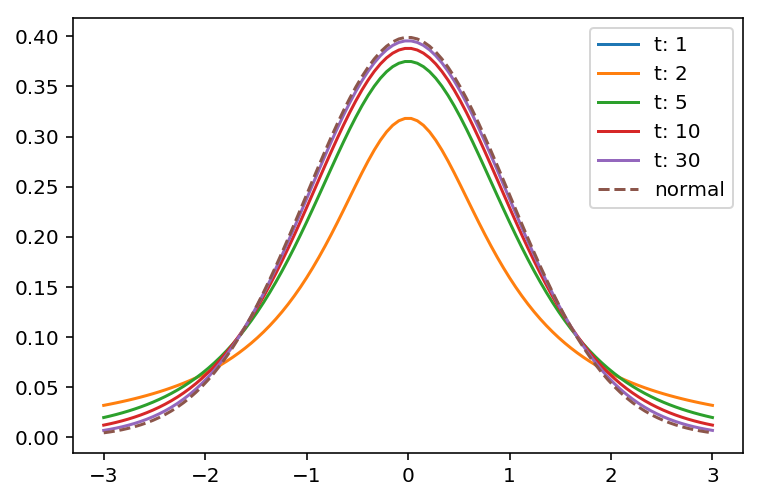

In [203]:
for n in [1, 2, 5, 10, 30]:
    xs = np.linspace(-3, 3, 100)
    ts = [scipy.stats.t.pdf(x , df=n-1) for x in xs]
    ns = [scipy.stats.norm.pdf(x) for x in xs]
    plt.plot(xs, ts, label=f't: {n}')
    
plt.plot(xs, ns, '--', label='normal')
plt.legend()


## two-sample

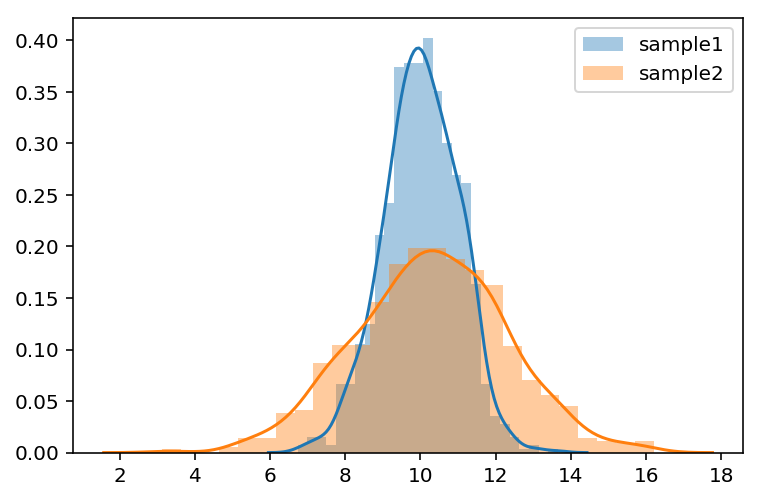

In [257]:
true_mean1 = 10
true_mean2 = 10.2
true_sd1 = 1
true_sd2 = 2

n1 = 1000
n2 = 1100

sample1 = true_sd1*np.random.randn(n1) + true_mean1
sample2 = true_sd2*np.random.randn(n2) + true_mean2

sns.distplot(sample1, label='sample1')
sns.distplot(sample2, label='sample2')
plt.legend()

### equal var

In [258]:
def cal_t(sample1, sample2):
    v1 = sample1.var(ddof=1)
    v2 = sample2.var(ddof=1)
    n1, n2 = sample1.shape[0], sample2.shape[0]
    df = n1 + n2 - 2.
    sedm = np.sqrt(((n1 - 1) * v1 + (n2 - 1) * v2) / df * (1.0 / n1 + 1.0 / n2))
    t = (sample1.mean() - sample2.mean()) / sedm
    return t

t = cal_t(sample1, sample2)

t

-3.6203026604466575

In [259]:
n1, n2 = sample1.shape[0], sample2.shape[0]
2*(1-scipy.stats.t.cdf(abs(t) , df=n1+n2-2))

0.00030123334862186546

In [260]:
stat, p = scipy.stats.ttest_ind(sample1, sample2)
stat, p

(-3.6203026604466575, 0.00030123334862193073)

#### confidence interval for equal var

In [278]:
sample1.mean()-sample2.mean()

-0.25415996897407389

In [279]:
confidence=0.95
(1-confidence)/2

0.025000000000000022

In [280]:
t_critial = scipy.stats.t.ppf(1-(1-confidence)/2, df=n-1)
t_critial

2.045229642132703

In [281]:
v1 = sample1.var(ddof=1)
v2 = sample2.var(ddof=1)
n1, n2 = sample1.shape[0], sample2.shape[0]
df = n1 + n2 - 2.
sedm = np.sqrt(((n1 - 1) * v1 + (n2 - 1) * v2) / df * (1.0 / n1 + 1.0 / n2))
h = t_critial * sedm
h

0.14358343794526046

In [282]:
sample1.mean()-sample2.mean()

-0.25415996897407389

In [283]:
(sample1.mean()-sample2.mean()-h, sample1.mean()-sample2.mean()+h)

(-0.39774340691933435, -0.11057653102881343)

### unequal var

In [266]:
def cal_t(sample1, sample2):
    v1 = sample1.var(ddof=1)
    v2 = sample2.var(ddof=1)
    n1, n2 = sample1.shape[0], sample2.shape[0]
    vn1 = v1 / n1
    vn2 = v2 / n2    
    df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
    sedm = np.sqrt(vn1+vn2)
    t = (sample1.mean() - sample2.mean()) / sedm
    return t

t = cal_t(sample1, sample2)

t

-3.7259665428025501

In [267]:
n1, n2 = sample1.shape[0], sample2.shape[0]
v1 = sample1.var(ddof=1)
v2 = sample2.var(ddof=1)
vn1 = v1 / n1
vn2 = v2 / n2    
n1, n2 = sample1.shape[0], sample2.shape[0]
df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))


2*(1-scipy.stats.t.cdf(abs(t) , df=df))

0.00020114700313977885

In [268]:
stat, p = scipy.stats.ttest_ind(sample1, sample2, equal_var=False)
stat, p

(-3.7259665428025501, 0.00020114700313990299)

#### confidence interval for unequal var

In [270]:
confidence=0.95
(1-confidence)/2

0.025000000000000022

In [271]:
t_critial = scipy.stats.t.ppf(1-(1-confidence)/2, df=n-1)
t_critial

2.045229642132703

In [272]:
v1 = sample1.var(ddof=1)
v2 = sample2.var(ddof=1)
n1, n2 = sample1.shape[0], sample2.shape[0]
vn1 = v1 / n1
vn2 = v2 / n2    
df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
sedm = np.sqrt(vn1+vn2)
sedm

0.068213164572031582

In [273]:
h = t_critial * sedm
h

0.13951158616639533

In [276]:
sample1.mean()-sample2.mean()

-0.25415996897407389

In [277]:
(sample1.mean()-sample2.mean()-h, sample1.mean()-sample2.mean()+h)

(-0.39367155514046925, -0.11464838280767856)